In [160]:
from PIL import Image, ImageDraw
import random
import math



In [153]:
def render(coord_paths, size, penup=False):
    im = Image.new(mode="RGB", size=size)
    d = ImageDraw.Draw(im)
    ImageDraw.floodfill(im,(1,1), (255,255,255))
    last_point = None
    for tpath in coord_paths:
        if penup and last_point:
            d.line((last_point[0], last_point[1],tpath[0][0], tpath[0][1]), fill=(0,255,0))
            
            
        if len(tpath)>0:
            last_point = tpath[0]
            for point in tpath[1:]:
                try:
                    d.line((last_point[0],last_point[1],point[0],point[1]), fill=(0,0,0))
                    last_point = point
                except Exception:
                    print("%s -> %s" % (last_point, point))
    return im

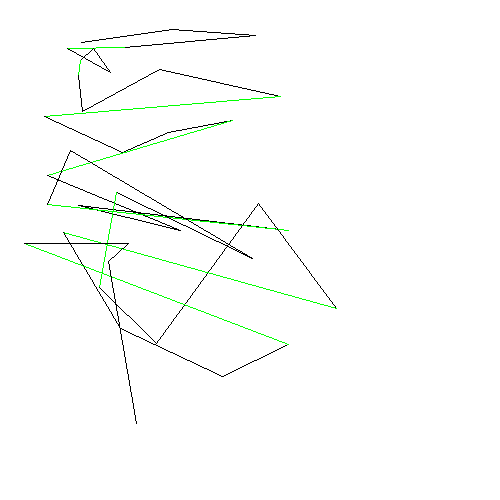

In [151]:
test_one = []

for i in range(1,10):
    tpath = []
    for p in range(1,5):
        point = (p*random.randint(20,100), random.randint(20,50)*i )
        #print(point)
        tpath.append(point)
    test_one.append(tpath)

render(test_one, (500,500), penup=True)

In [113]:
def distance(pointa, pointb):
    return math.sqrt((pointa[0]-pointb[0]) ** 2 + (pointa[1]-pointb[1])**2)

def calc_total_move(paths):
    total_draw = 0
    total_move = 0
    
    last_point = None
    for path in paths:
        if len(path) > 0:
            if last_point:
                total_move += distance(last_point, path[1])
                last_point = path[1]
            else:
                last_point = path[1]
            
            for point in path[1:]:
                #print(last_point)
                total_draw += distance(last_point, point)
                last_point = point
    
    return (total_draw, total_move)



In [114]:
draw, move = calc_total_move(test_one)


In [115]:
def optimise_route_a(paths):
    
    new_paths = []
    
    path = paths.pop()
    new_paths.append(path)
    
    while len(paths) > 0:
        shortest = None
        shortest_val = float('inf')
        
        #orig_side = None # at the moment always the 'far'
        bottom_side = None
        
        for p in paths:
            #print(new_paths)
            #print(p)
            ndist = distance(new_paths[-1][-1], p[0])
            if ndist < shortest_val:
                shortest = p
                shortest_val = ndist
                bottom_side ='Near'
    
            fdist = distance(new_paths[-1][-1], p[-1])
            if fdist < shortest_val:
                shortest = p
                shortest_val = fdist
                bottom_side='Far'
                
        # path finder, reverser. 
        #print(shortest)
        paths.remove(shortest)
        if bottom_side == 'Far':
            shortest.reverse()
        #print(shortest)
        new_paths.append(shortest)
        
    return new_paths

Was: 7440.18037411179 / 7234.268434220611 
Now: 2223.620397613504 / 7234.26843422061
Reduction: 5216.559976498286 (0.298866463688249) (0.6445140771804502 real)
104
104


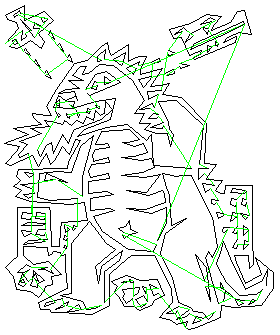

In [173]:
test = svgpaths.copy()

orig_draw, orig_move = calc_total_move(test)
new_paths = optimise_route_a(test)
new_draw, new_move = calc_total_move(new_paths)

print ("Was: %s / %s " % (orig_move, orig_draw))
print("Now: %s / %s" % (new_move, new_draw))
print('Reduction: %s (%s) (%s real)' % (orig_move - new_move, new_move/orig_move, (new_draw + new_move) / (orig_draw+orig_move)))

print(len(svgpaths))
print(len(new_paths))
render(new_paths, (280,335), penup=True)



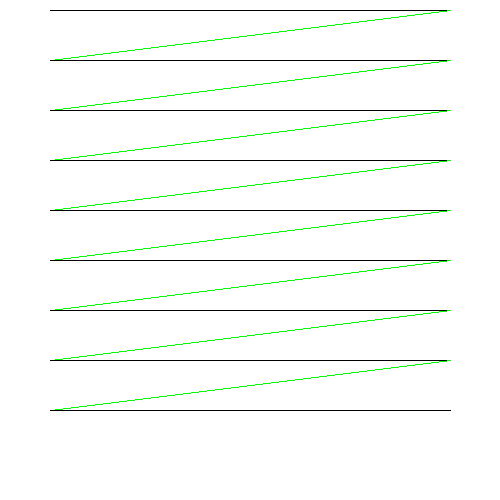

In [131]:
test_two = []

for i in range(9):
    path = []
    point_a = (50, 10+i*50)
    point_b = (450, 10+ i*50)
    
    path.append(point_a)
    path.append(point_b)
    
    test_two.append(path)
    
render(test_two, (500,500), penup=True)

In [174]:
def reduce(paths, tolerance=10):
    new_paths = []
    for path in paths:
        if len(path)>1:
            n_path = [path[0]]
            last = path[0]
            for point in path[1:]:
                delta = distance(last, point)
                
                if delta > tolerance:
                    n_path.append(point)
                    last = point
                else:
                    pass
            
            if len(n_path) > 1:
                new_paths.append(n_path)
    return new_paths
                

Was: 158.3846648642279 / 1364.4118621056011 [1522.796526969829]
Now: 136.78058966596737 / 1310.6320683749354 [1447.412658040903]
Reduction: 21.604075198260517 (0.8635974308700897) (0.9504964270709689 real)
3
3


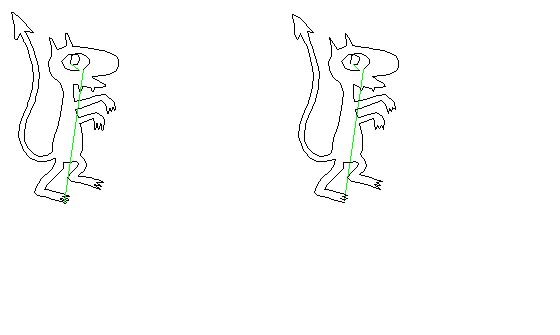

In [189]:
import json
with open('luci.json') as fp:
    svgpaths = json.load(fp)
    remove_empty(svgpaths)
      

test = svgpaths.copy()

orig_draw, orig_move = calc_total_move(test)
new_paths = reduce(test, tolerance=3)
new_paths = optimise_route_a(new_paths)
new_draw, new_move = calc_total_move(new_paths)

print("Was: %s / %s [%s]" % (orig_move, orig_draw, orig_move + orig_draw))
print("Now: %s / %s [%s]" % (new_move, new_draw, new_move + new_draw))
print('Reduction: %s (%s) (%s real)' % (orig_move - new_move, new_move/orig_move, (new_draw + new_move) / (orig_draw+orig_move)))

print(len(svgpaths))
print(len(new_paths))

size = (280,335)

orig = render(svgpaths, size, penup=True)
new = render(new_paths, size, penup=True)

out = Image.new(mode='RGB', size=(orig.size[0]*2, orig.size[1]))
out.paste(orig, (0, 0))
out.paste(new, (orig.size[0], 0))

out

In [190]:
test_two

[[(50, 10), (450, 10)],
 [(50, 60), (450, 60)],
 [(50, 110), (450, 110)],
 [(50, 160), (450, 160)],
 [(50, 210), (450, 210)],
 [(50, 260), (450, 260)],
 [(50, 310), (450, 310)],
 [(50, 360), (450, 360)],
 [(50, 410), (450, 410)]]

In [119]:
new_paths

[[(50, 410), (450, 410)],
 [(450, 360), (50, 360)],
 [(50, 310), (450, 310)],
 [(450, 260), (50, 260)],
 [(50, 210), (450, 210)],
 [(450, 160), (50, 160)],
 [(50, 110), (450, 110)],
 [(450, 60), (50, 60)],
 [(50, 10), (450, 10)]]

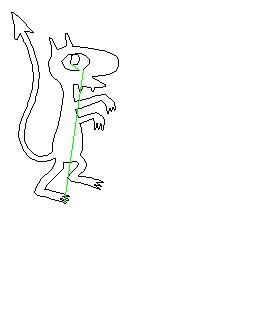

In [201]:
import json
with open('luci.json') as fp:
    svgpaths = json.load(fp)
    remove_empty(svgpaths)
#print(svgpaths)
render(svgpaths, (280,335), penup=True)

In [104]:
def remove_empty(paths):
    for path in paths:
        if len(path) == 0:
            paths.remove(path)

In [159]:
with open("godzilla2.json", "w") as fp:
    json.dump(new_paths,fp)

In [193]:
from simplification.cutil import (
    simplify_coords,
    simplify_coords_idx,
    simplify_coords_vw,
    simplify_coords_vw_idx,
    simplify_coords_vwp,
)

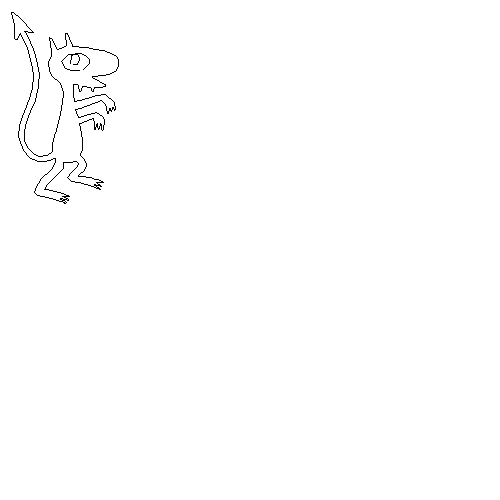

In [202]:
new_paths = []
for path in svgpaths:
    path = simplify_coords(path, 0.1)
    new_paths.append(path)
render(new_paths, (500,500))

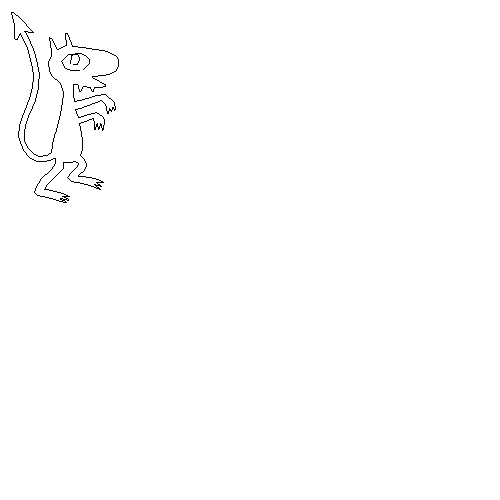

In [205]:
new_paths = []
for path in svgpaths:
    path = simplify_coords_vw(path, 1)
    new_paths.append(path)
render(new_paths, (500,500))